In [2]:

from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving containerjpg.jpg to containerjpg.jpg


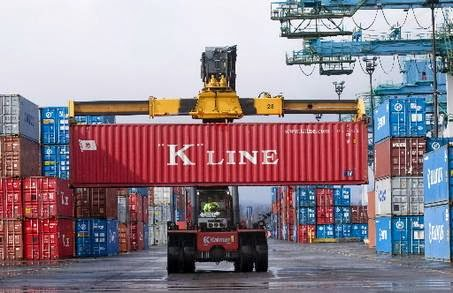

In [4]:
for filename in uploaded.keys():
    display(Image(filename))


**Local container yard in Houston tx**

 The following data represents the daily number of containers a port yard has reported in the last 30 days waiting to be dispathced.The port yard has an actual capacity of 250 containers.
    
    (100, 120, 130, 150, 140 160, 175, 110, 120, 115,
     125, 130, 120, 125, 156, 170, 220, 130, 110, 90,
     50, 75, 100, 120, 123,170, 110, 100, 95, 110)
    
1. Determine the average number of containers in the yard. If the cost of holding a container at the yard one day is 17 usd,
what is the average cost charged to the shiping line per day?

2. What is the median cost?

3. The shiping line is challenging the port to pay only USD$1,870 in demurrages per day. What proportion of the time is this
cost true? Should the port accept it? why?

4. The port authority is considering to reduce the yard space to a capacity of 150 containers, would you recommed this reduction?
why?

5. The port may accept to keep the actual capacity if the yard has a capacity betwwen 69 and 180 containers at least 60% of the time.
Use Chebyshev's approach to give an answer to the port.
    

1.   List item

1.   List item
2.   List item


2.   List item



In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# making a aray of the containers
containerData = np.array([100, 120, 130, 150, 140, 160, 175, 110, 120, 115,
     125, 130, 120, 125, 156, 170, 220, 130, 110, 90,
     50, 75, 100, 120, 12])

In [7]:
# get the min and max
min =np.min(containerData)
max = np.max(containerData)
print(min)
print(max)
len(containerData)

12
220


25

In [8]:
# create 11 bins for the data with whole number
bins = np.linspace(min, max, 11)
bins





array([ 12. ,  32.8,  53.6,  74.4,  95.2, 116. , 136.8, 157.6, 178.4,
       199.2, 220. ])

In [9]:
bins = np.round(bins).astype(int)

In [10]:
# calclate the frequancy for each clas
freg, edges = np.histogram(containerData, bins =bins)

In [11]:
edges = edges[:-1]
print(edges)
print(freg)


[ 12  33  54  74  95 116 137 158 178 199]
[1 1 0 2 5 9 3 3 0 1]


In [12]:
# calculate relative freguancy
relFreq = freg/len(containerData)
print(relFreq)

[0.04 0.04 0.   0.08 0.2  0.36 0.12 0.12 0.   0.04]


0.04: 4% of the data points fall into the first bin.
0.04: 4% of the data points fall into the second bin.
0.00: 0% of the data points fall into the third bin.
0.08: 8% of the data points fall into the fourth bin.
0.20: 20% of the data points fall into the fifth bin.
0.36: 36% of the data points fall into the sixth bin.
0.12: 12% of the data points fall into the seventh bin.
0.12: 12% of the data points fall into the eighth bin.
0.00: 0% of the data points fall into the ninth bin.
0.04: 4% of the data points fall into the tenth bin

In [13]:
# calculate the cumulative frequarncy
cumFreq = np.cumsum(relFreq)
print(cumFreq)

[0.04 0.08 0.08 0.16 0.36 0.72 0.84 0.96 0.96 1.  ]


In [14]:
# calculate relative comualtive freguency
relCumfreg = np.cumsum(relFreq)
print(relCumfreg)

[0.04 0.08 0.08 0.16 0.36 0.72 0.84 0.96 0.96 1.  ]


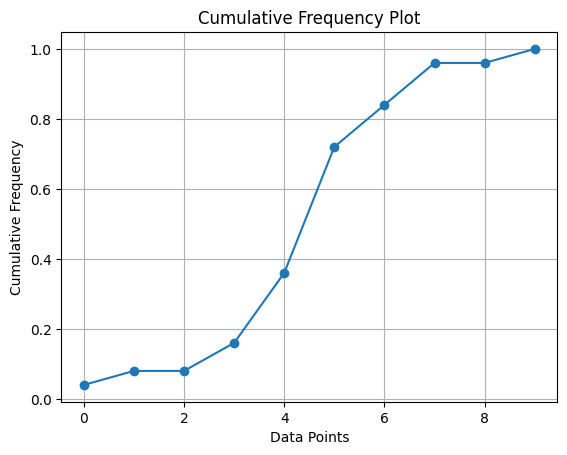

In [15]:
# Plot the cumulative frequency data
plt.plot(cumFreq, marker='o', linestyle='-')
plt.title('Cumulative Frequency Plot')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

**most of the data points are concentrated in the middle bins, with rapid accumulation around the 5th and 6th bins.**

0.04: 4% of the data points fall into the first bin.
0.08: 8% of the data points fall into the first two bins combined.
0.08: 8% of the data points fall into the first three bins combined.
0.16: 16% of the data points fall into the first four bins combined.
0.36: 36% of the data points fall into the first five bins combined.
0.72: 72% of the data points fall into the first six bins combined.
0.84: 84% of the data points fall into the first seven bins combined.
0.96: 96% of the data points fall into the first eight bins combined.
0.96: 96% of the data points fall into the first nine bins combined.
1.00: 100% of the data points fall into all ten bins.

In [16]:
# calulate anles for pie chart
angles = relFreq * 360
print(angles)

[ 14.4  14.4   0.   28.8  72.  129.6  43.2  43.2   0.   14.4]


In [17]:
#create a DataFrame to display the tables
distributionTable = pd.DataFrame({
   'Classes': [f'{int(edges[i])}-{int(edges[i+1]-1)}' for i in range(len(edges)-1)] + [f'{int(edges[-1])}-79'],
    'Frequency': freg,
    'Relative Frequency': relFreq,
    'Cumulative Frequency': cumFreq,
    'Relative Cumulative Frequency': relCumfreg,
    'Angle': angles
})

In [18]:
# Display the table
print(distributionTable.to_string(index=False))

Classes  Frequency  Relative Frequency  Cumulative Frequency  Relative Cumulative Frequency  Angle
  12-32          1                0.04                  0.04                           0.04   14.4
  33-53          1                0.04                  0.08                           0.08   14.4
  54-73          0                0.00                  0.08                           0.08    0.0
  74-94          2                0.08                  0.16                           0.16   28.8
 95-115          5                0.20                  0.36                           0.36   72.0
116-136          9                0.36                  0.72                           0.72  129.6
137-157          3                0.12                  0.84                           0.84   43.2
158-177          3                0.12                  0.96                           0.96   43.2
178-198          0                0.00                  0.96                           0.96    0.0
 199-79   

**116-136: Highest frequency (9) and relative frequency (0.36), indicating the most data points are concentrated here.
95-115: Significant frequency (5) and relative cumulative frequency jumps to 0.36, showing a major accumulation in this range.**

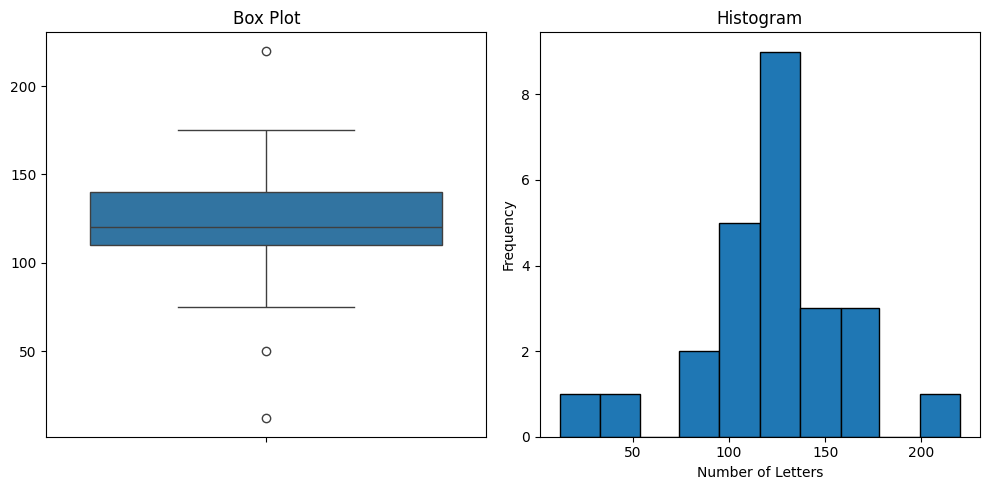

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot a box plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(containerData)
plt.title('Box Plot')

# Plot a histogram
plt.subplot(1, 2, 2)
plt.hist(containerData, bins=[12,33,54,74,95,116,137,158,178,199,220], edgecolor='black')

plt.title('Histogram')
plt.xlabel('Number of Letters')
plt.ylabel('Frequency')



# Display the plots
plt.tight_layout()
plt.show()

**Insights**

box:

The  plot on the left shows a data distribution with a median around 125, an interquartile range (IQR) between 100 and 150, and a few outliers below 50 and above 200.

Histogram:

The histogram on the right reveals that the most common number of letters ranges between 100 and 150, with a noticeable peak around 125. There are fewer instances of very low and very high letter counts. The histogram apears to be slightly left-skewed since there are a few lower values stretching out to the left.

In [25]:
# get some stats
mean = np.mean(containerData)
median = np.median(containerData)
mode = stats.mode(containerData)
std = np.std(containerData)
rangee = np.ptp(containerData)
#standard deviation
std_dev = np.std(containerData, ddof=1)
# variance
var = np.var(containerData, ddof=1)
#display reuslts
print("mean:", mean)
print("median:", median)
print("mode:", mode)
print("standard deviation:", std)
print("range:", rangee)
print("variance:", var)
print("standard deviation:", std_dev)

mean: 122.12
median: 120.0
mode: ModeResult(mode=120, count=4)
standard deviation: 40.23562600482314
range: 208
variance: 1686.36
standard deviation: 41.06531383053099


**Insights:**
Here are the insights based on the given statistics:

1. **Mean (122.12):** On average, the number of shipping containers is 122.12.
2. **Median (120.0):** The midpoint of the dataset is 120, meaning half of the observations are below this value and half are above.
3. **Mode (120, count=4):** The most frequently occurring number of shipping containers is 120, appearing 4 times.
4. **Standard Deviation (40.24 and 41.07):** The number of shipping containers typically deviates from the mean by about 40.24 to 41.07, indicating a moderate variability around the average.
5. **Range (208):** The difference between the maximum and minimum values is 208, suggesting a wide spread in the number of containers.
6. **Variance (1686.36):** The average squared deviation from the mean is 1686.36, consistent with the standard deviation values, reflecting moderate variability.

These statistics indicate a dataset with a central tendency around 120 containers, moderate variability, and a wide range, suggesting some outliers. The histogram and box plot reinforce these observations, showing a slightly left-skewed distribution with most values concentrated around the mean.



In [29]:
# calculate the percentiles
percentiles = [10,25, 50, 75,90]
percentiles_values = np.percentile(containerData, percentiles)

# create a dataframe to display the table
percentilesTable = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentiles_values
})

# display the table
print(percentilesTable.to_string(index=False))


 Percentile  Value
         10   81.0
         25  110.0
         50  120.0
         75  140.0
         90  166.0


10th Percentile (81.0): 10% of the shipping container counts are 81 or fewer. This indicates that the lower end of the dataset has relatively fewer containers.
25th Percentile (110.0): 25% of the container counts are 110 or fewer. This value represents the lower quartile, showing that a quarter of the data lies below 110.
50th Percentile (120.0): 50% of the container counts are 120 or fewer. This is the median, indicating the middle of the dataset.
75th Percentile (140.0): 75% of the container counts are 140 or fewer. This represents the upper quartile, showing that three-quarters of the data lies below 140.
90th Percentile (166.0): 90% of the container counts are 166 or fewer. This indicates that the upper end of the dataset has relatively higher counts.

**Take Away**

Overall, the data is centered around the median (120), with a relatively balanced distribution between the lower and upper quartiles but with a tendency towards higher container counts on the upper end.

**Answers**


1.   Avg cost per containers = Average cost=2,076.
2.   Median cost= 2,040.







**The shipping line is challenging the port to pay only 1,870 USD in demurrages per day. What proportion of the time is this cost true? Should the port accept it? Why?**

Cost corresponding to 1,870 USD:
Number of containers
=
1870
17
Number of containers=
17
1870
​

Number of containers
≈
110
Number of containers≈110

Proportion of time this cost is true:
From the percentiles:

The 25th percentile is 110, meaning 25% of the time, the number of containers is 110 or fewer.
So, the proportion of time the cost is true is 25%.

Should the port accept it?

The port should not accept it because it would only cover the cost 25% of the time, meaning 75% of the time, the port would incur losses.


**The port authority is considering reducing the yard space to a capacity of 150 containers. Would you recommend this reduction? Why?**
75th Percentile: The 75th percentile value is 140, meaning 75% of the time, the number of containers is 140 or fewer.

Recommendation:

Reducing the yard space to 150 containers would be reasonable since 75% of the time, the number of containers is below 150. However, it would be tight during the times when the number of containers exceeds 150, which happens 25% of the time. This reduction could lead to operational challenges during peak periods.